Loading the Image Data


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


Preparing the Image Data

In [0]:
train_images = train_images_original.reshape((60000, 28, 28))
train_images = train_images.astype('float64') / 255

test_images = test_images_original.reshape((10000, 28, 28))
test_images = test_images.astype('float64') / 255

avgfeatures = np.zeros((1, 28), dtype='float64')
train_features = np.zeros((60000, 29), dtype='float64')
test_features = np.zeros((10000, 29), dtype='float64')
heights = np.zeros((1, 2), dtype='float64')
height = np.zeros((1, 1), dtype='float64')

In [0]:
currindex = 0
found = False

for i in train_images:
  avg_features = np.mean(i, axis = 0) + np.mean(i, axis = 1)
  
  for j in range(28):
    for k in range(28):
      if(i[j][k] == 0):
        continue
      else:
        heights[0][0] = j
        found = True
        break
    if(found):
      found = False
      break
  
  for j in reversed(range(28)):
    for k in reversed(range(28)):
      if(i[j][k] == 0):
        continue
      else:
        heights[0][1] = j
        found = True
        break
    if(found):
      found = False
      break

  height[0][0] = heights[0][1] - heights[0][0] + 1
  temparr = np.concatenate((avg_features, height), axis = None)
  train_features[currindex] = temparr
  heights[0][0] = 0
  heights[0][1] = 0
  currindex = currindex + 1

In [0]:
currindex = 0
found = False

for i in test_images:
  avg_features = np.mean(i, axis = 0) + np.mean(i, axis = 1)
  
  for j in range(28):
    for k in range(28):
      if(i[j][k] == 0):
        continue
      else:
        heights[0][0] = j
        found = True
        break
    if(found):
      found = False
      break
  
  for j in reversed(range(28)):
    for k in reversed(range(28)):
      if(i[j][k] == 0):
        continue
      else:
        heights[0][1] = j
        found = True
        break
    if(found):
      found = False
      break

  height[0][0] = heights[0][1] - heights[0][0] + 1
  temparr = np.concatenate((avg_features, height), axis = None)
  test_features[currindex] = temparr
  heights[0][0] = 0
  heights[0][1] = 0
  currindex = currindex + 1

Preparing the Labels

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

The Network Architecture

In [6]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(29,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               15360     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


The Compilation Step

In [7]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

The Training Step

In [8]:
epochs = 20
history = network.fit(train_features, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_features, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 2s 32us/step - loss: 1.5777 - acc: 0.4801 - val_loss: 1.2199 - val_acc: 0.6043
Epoch 2/20
60000/60000 [==============================] - 1s 18us/step - loss: 1.1761 - acc: 0.6132 - val_loss: 1.1384 - val_acc: 0.6230
Epoch 3/20
60000/60000 [==============================] - 1s 18us/step - loss: 1.1031 - acc: 0.6400 - val_loss: 1.0636 - val_acc: 0.6408
Epoch 4/20
60000/60000 [==============================] - 1s 18us/step - loss: 1.0530 - acc: 0.6541 - val_loss: 1.0192 - val_acc: 0.6572
Epoch 5/20
60000/60000 [==============================] - 1s 18us/step - loss: 1.0098 - acc: 0.6666 - val_loss: 0.9821 - val_acc: 0.6768
Epoch 6/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.9692 - acc: 0.6815 - val_loss: 0.9584 - val_acc: 0.6882
Epoch 7/20
60000/60000 [==

Display the Training/Test Loss/Accuracy

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

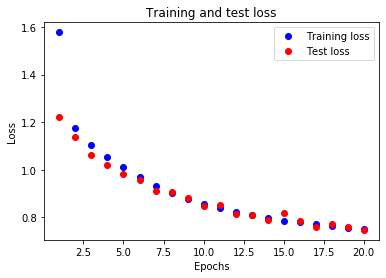

In [10]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

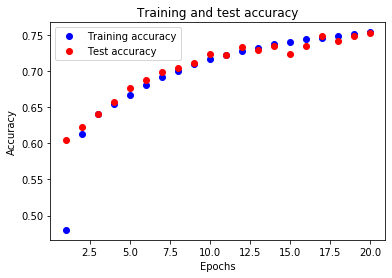

In [12]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()